<br><br><br><br>
# P2. Investigate a dataset
# 1. Introduction


"Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history." (source: Wikipedia)

For this project I will analyze the Titanic dataset, which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The purpose of the project is to identify what factors made people more likely to survive. 
<br></br>
<br>The description of the variables in the dataset are published on Kaggle website:</br>

* survival:        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Survival (0 = No; 1 = Yes) 
                
* pclass:          &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name:            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Name
* sex:             &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sex
* age:             &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Age
* sibsp:           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Number of Siblings/Spouses Aboard
* parch:           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Number of Parents/Children Aboard
* ticket:          &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ticket Number
* fare:            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Passenger Fare
* cabin:           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cabin
* embarked:        &nbsp;&nbsp;Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
* Pclass is a proxy for socio-economic status (SES)
&nbsp;1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
&nbsp;If the Age is Estimated, it is in the form xx.5

* With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

> &nbsp;&nbsp;Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

> &nbsp;&nbsp;Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# 2. Question phase
In this report, I will try to answer the questions below:
><br>1.Did age influence survival? 
<br>2.Did gender influence survival? 
<br>3.Did gender and social class influence survival?
<br>4.Did social class influence survival?  
5.Did family presence on Titanic board influence survival? 
<br>6.Did family size influence survival? 
<br>7.Did presence of family on board and social class influence survival?</br>





# 3. Wrangling phase
## 3.1 Import libraries and CSV file

In [1]:
#Import libraries pandas, numpy and matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import CSV
titanic_df=pd.read_csv('titanic_data.csv')

## 3.2 Data exploration
In this phase I investigate the dataset, summarize its main characteristics and clean any problems I may find. 
<br>First, let's explore and get familiar with the data we have.</br>

In [3]:
titanic_df.shape 

(891, 12)

The dataset contains 891 rows and 12 columns (variables).

* **a) Get first 10 rows to see how the data is organized.**


In [4]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* **b) Columns data types:**

In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* **c) Find if any PassengerId / Name duplicates**

In [6]:
titanic_df.PassengerId.nunique()

891

In [7]:
titanic_df.Name.nunique()

891

&nbsp;&nbsp;&nbsp; No duplicates were found for PassengerId or Name. 

* **d) Identify missing values**

In [8]:
titanic_df.apply(lambda x: sum(x.isnull()),axis=0) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

&nbsp;&nbsp;&nbsp; There are **_177_** missing values in Age column, **_687_** missing values in Cabin column and **_2_** missing values in Embarked column.

* **e) Summary statistics of numeric variables**

In [9]:
titanic_df.describe()

C:\Program Files (x86)\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* This is another way to easily see the missings for numeric variables: Age has only 714 counts in the table above. The average Age was ~29, the oldest person on the board was 80 years old, and the youngest was 4 months.
* Most of the passengers had a 3rd class ticket.
* Fare minimum value is 0. This is strange, as it means some passengers didn't pay for their ticket. There is a huge difference between the mean and max fare. Further exploration of the fare variable will be done later in the report. 


## 3.3 Data cleaning

In [10]:
#Create a function to plot distribution:
def simple_graph(variable_name,xlabel,ylabel,title):
   ax=variable_name.value_counts().plot(kind='bar',color="#3F5D7D", alpha=0.8)
   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   for p in ax.patches:
        b=p.get_bbox()
        ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.05, b.y1 + 5))
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['bottom'].set_visible(True)
   ax.spines['left'].set_visible(True)
   ax.xaxis.set_ticks_position('none') 
   ax.yaxis.set_ticks_position('none') 

### 3.3.1 AGE 
* **Age distribution of the passengers.**

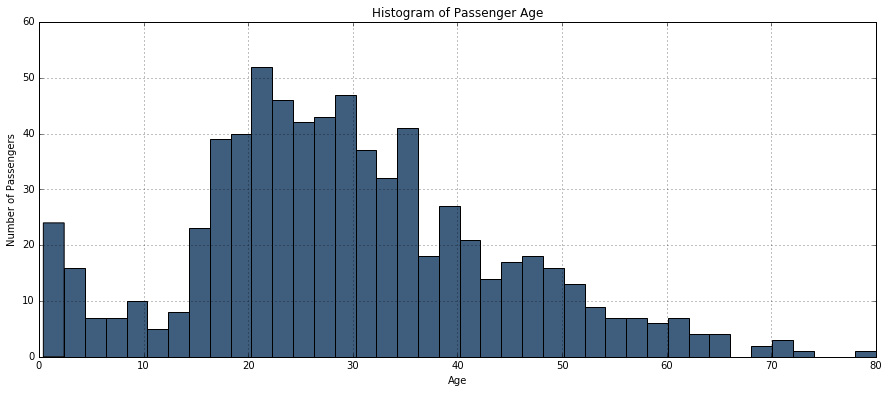

In [11]:
#age histogram
figure = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')    
titanic_df.Age.hist(color="#3F5D7D",bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Histogram of Passenger Age")

From the histogram, we see that the most common ages are between 20 and 30.

* **Compute age categories**

In [12]:
def age_categ(df):
    if df['Age']<18:
        return '<18'
    elif df['Age']>=18 and df['Age']<30:
        return '[18-30)'
    elif df['Age']>=30 and df['Age']<40:
        return '[30:40)'
    elif df['Age']>=40 and df['Age']<50:
        return '[40:50)'
    elif df['Age']>=50 and df['Age']<60:
        return '[50:60)'
    elif df['Age']>=60:
        return '>=60'

titanic_df['age_categ'] = titanic_df.apply(age_categ, axis=1)
titanic_df['age_categ'].value_counts()

[18-30)    271
[30:40)    167
<18        113
[40:50)     89
[50:60)     48
>=60        26
Name: age_categ, dtype: int64

* **Distribution of age across gender**

In [43]:
#Crosstab age by gender
age_sex=pd.crosstab(titanic_df.age_categ, titanic_df.Sex,normalize='columns')   
age_sex
age_sex.style.format("{:.2%}")

(-1.0165424489269506,
 1.0222118083161249,
 -1.0093609307234566,
 1.0000000021151181)

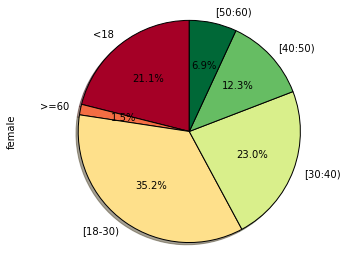

In [14]:
age_sex_counts=pd.crosstab(titanic_df.age_categ, titanic_df.Sex)   
pie_female=age_sex_counts.female.plot(kind='pie', startangle=90, shadow=True, autopct='%1.1f%%',cmap=plt.cm.RdYlGn)
plt.axis('equal')

(-1.0204288249820255, 1.0235269628159254, -1.0208631918253905, 1.0)

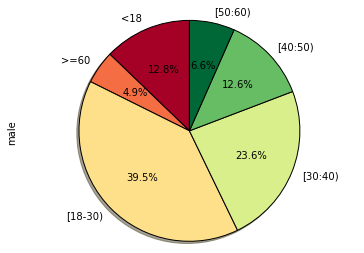

In [15]:
pie_male=age_sex_counts.male.plot(kind='pie',startangle=90, shadow=True, autopct='%1.1f%%',cmap=plt.cm.RdYlGn)
plt.axis('equal')

### 3.3.2 GENDER
* **Compute a new variable with sex categories recoded into Female, Male and Child (passengers younger than 18 years old will be considered children)**

In [16]:
#function to recode the gender:
def sex_category(df):                                
    if df.Age<18:
        return 'child'
    else:
        return df.Sex 
titanic_df['Sex_recoded']=titanic_df.apply(sex_category,axis=1)  #apply the function to Sex_recoded variable
titanic_df['Sex_recoded'].value_counts()                         #Sex_recoded frequency 

male      519
female    259
child     113
Name: Sex_recoded, dtype: int64

* **Gender distribution of Passengers**

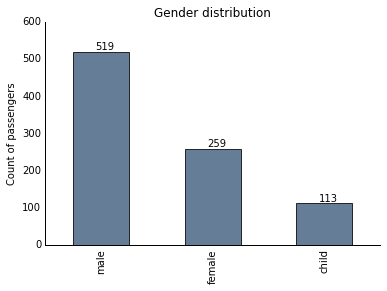

In [17]:
simple_graph(titanic_df.Sex_recoded,' ','Count of passengers','Gender distribution')

The number of male is ~50% higher than the number of females on board of Titanic. 

### 3.3.3 EMBARKED
* **Handling missing values:**
<br>Only 2 passengers have missing values for embarked variable. I will replace the missings with the most common value in embarked column.

In [18]:
titanic_df.Embarked.mode()                               #find the most common value
titanic_df.Embarked = titanic_df.Embarked.fillna("S")    #replace missings with mode 
titanic_df.Embarked.value_counts()                       #Embarked frequency

S    646
C    168
Q     77
Name: Embarked, dtype: int64

* **Replace S with Southampton, C with Cherbourg, Q with Queenstown using the function below**

In [19]:
def city(value):
    if value=='C':
        return 'Cherbourg'
    elif value=='Q':
        return 'Queenstown' 
    elif value=='S':
        return 'Southampton' 

titanic_df.Embarked=titanic_df.Embarked.map(city)

* **Embarked distribution of Passengers** 

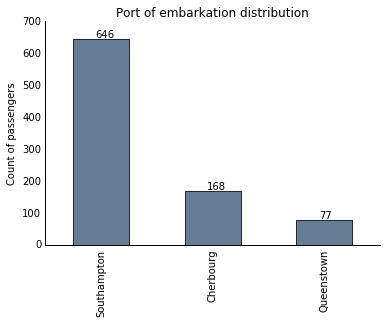

In [20]:
simple_graph(titanic_df.Embarked,' ','Count of passengers','Port of embarkation distribution')

Most passengers embarked on Sounthampton port.

### 3.3.4 FAMILY ON BOARD
* **Compute a new variable Has_family with value 1 if a person had any family member aboard (Parch+SibSp) and value 0 otherwise using the function below:**

In [21]:
titanic_df['Has_Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]    
def family(value):                                                           
    if value>0:                                                         
        return 'Yes'
    else:
        return 'No'

titanic_df['Family_size']=titanic_df['Has_Family']+1   #Add 1 (the passenger) to the number of relatives 
titanic_df.Has_Family= titanic_df.Has_Family.map(family)    

* **Passengers with family distribution** 

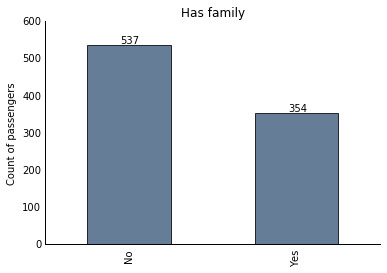

In [22]:
simple_graph (titanic_df.Has_Family,'','Count of passengers' ,'Has family')

* **Family size ** 

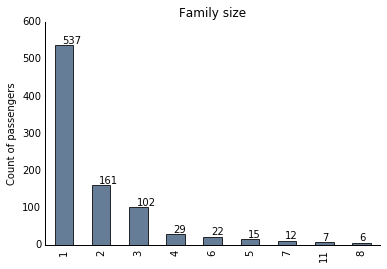

In [23]:
simple_graph (titanic_df.Family_size,'','Count of passengers' ,'Family size')

Most passengers were traveling alone, without family. The maximum family size was 11 family members (the passenger and 10 relatives). 

### 3.3.5 PCLASS
* **Recode 1=Upper Class; 2=Middle Class; 3=Lower Class**

In [24]:
def recode_class(value):                                 #function to recode class
    if value==1:
        return 'Upper Class'
    elif value==2:
        return 'Middle Class'
    elif value==3:
        return 'Lower Class'
titanic_df.Pclass= titanic_df.Pclass.map(recode_class)   #apply the function to Pclass 
titanic_df.Pclass.value_counts()                         #Pclass frecquency

Lower Class     491
Upper Class     216
Middle Class    184
Name: Pclass, dtype: int64

* **Pclass distribution**

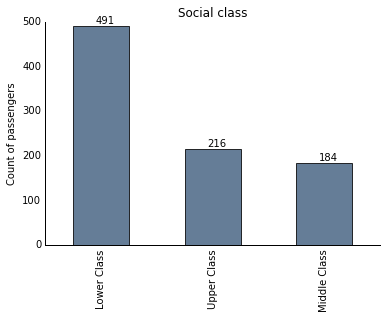

In [25]:
simple_graph (titanic_df.Pclass,'','Count of passengers' ,'Social class')

More than half of the passengers had a 3rd class ticket.

### 3.3.6 SURVIVABILITY

* **Survivability distribution**

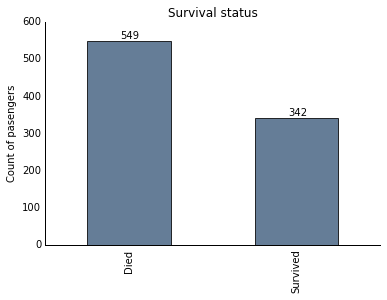

In [26]:
ax=titanic_df['Survived'].value_counts().plot(kind='bar',color="#3F5D7D", alpha=0.8)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Died'
labels[1] = 'Survived'
ax.set_xticklabels(labels)

plt.title('Survival status')
plt.xlabel('')
plt.ylabel('Count of pasengers')
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.05, b.y1 + 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# 4. Exploration phase

In [27]:
#Function for graphs
def graphs_survival(variable_name, xlabel,ylabel,title):
    ax=variable_name.plot(kind='bar',width=0.75,color=['r','g'], alpha=0.8,figsize=(8, 5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.03),
              ncol=1, fancybox=True)
    for p in ax.patches:
        b=p.get_bbox()
        ax.annotate("{:.2%}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.12, b.y1 + 0.02))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')  

### 4.1. Did age influence survival?    



* **Crosstab Age statistics by Survival status**

In [28]:
age_survival=titanic_df.groupby('Survived').Age.describe().unstack(level=0)
age_survival_df=pd.DataFrame(np.array(age_survival), index=age_survival.index, columns=['Died','Survived'])
age_survival_df

,Died,Survived
count,424.000000,290.000000
mean,30.626179,28.343690
std,14.172110,14.950952
min,1.000000,0.420000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,74.000000,80.000000


* **Survival by Age graph**

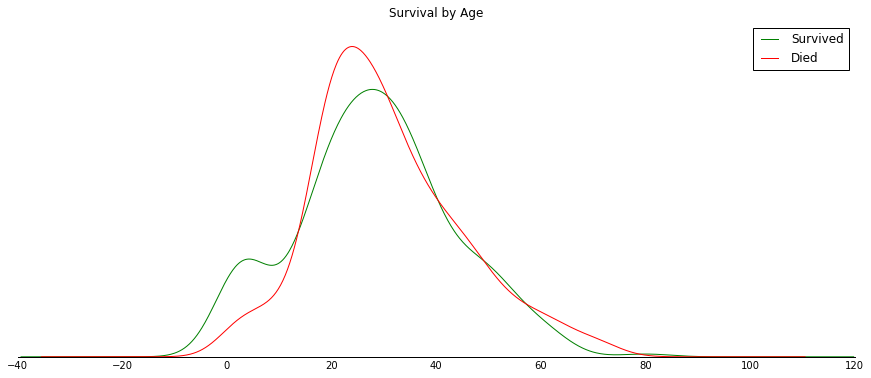

In [29]:
p_survived_age = titanic_df[titanic_df['Survived']==1]['Age']
p_died_age = titanic_df[titanic_df['Survived']==0]['Age']
ax=p_survived_age.plot(kind='density',color='g',figsize=(15, 6))
p_died_age.plot(kind='density',color='r',figsize=(15, 6))

plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(['Survived','Died'])
plt.title('Survival by Age') 
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.2%}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.15, b.y1 + 0.009))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')  


From the statistics, we see that the minimum age of children who died is 1 years old, while minimum age of the children who survived was 5 months old. On the plot we see that many children survived the accident, compared to the children
who didn't.
<br><br>The graph shows a lower rate of survival for almost all adults. But, there were more male aboard than women and we know that women and children are to be saved first in a life-threatening situation. This surely influence the survival distribution.
<br><br>We must look at the survival distribution based on gender.

### 4.2. Did gender influence survival?    

* **Crosstab Gender by Survival status**

In [30]:
sex_surv=pd.crosstab(titanic_df.Sex_recoded, titanic_df.Survived,normalize='index')   
sex_surv.columns= ["Died","Survived"]
sex_surv
sex_surv.style.format("{:.2%}")

* ** Survival rate by Gender graph**

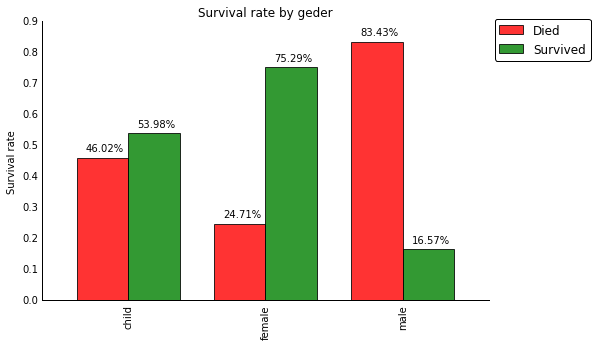

In [31]:
graphs_survival(sex_surv,' ','Survival rate','Survival rate by geder')

The chances to survive were: 0.54 for children, 0.75 for women and only 0.16 for male. This shows that indeed children and female were first to save. But I don't see a significant difference between children who survived and those who didn't. Maybe the social class is an important factor which could explain this case.

### 4.3. Did gender and social class influence survival?

* **Crosstab Sex_recoded & Pclass by Survival status**

In [32]:
survived_sex_class = pd.crosstab(index=[titanic_df["Sex_recoded"],titanic_df["Pclass"]], 
                                 columns=titanic_df["Survived"],
                                 margins=True)
survived_sex_class.columns= ["Died","Survived","Totalcol"]

survived_sex_class=survived_sex_class.div(survived_sex_class["Totalcol"],axis=0)
survived_sex_class.style.format("{:.2%}")

* **Survival rate by Gender and Social status graph**

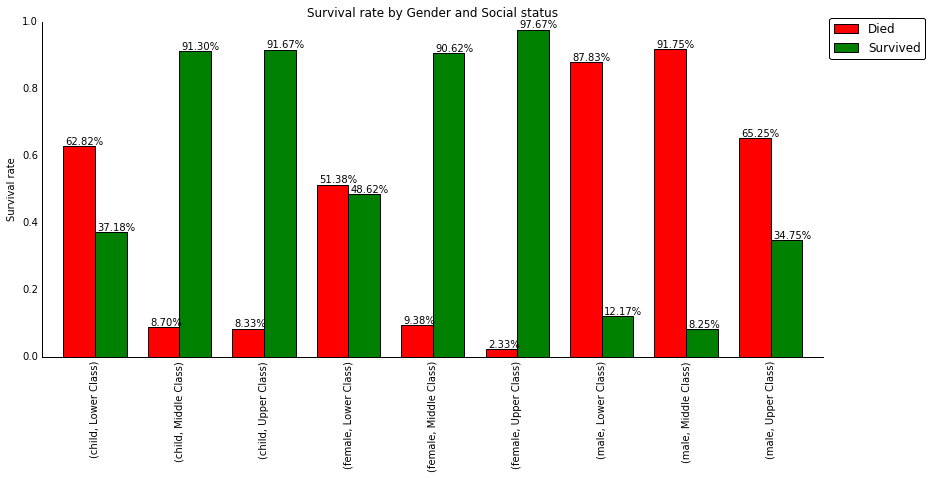

In [33]:
ax=survived_sex_class.iloc[:9,:2].plot(kind='bar', color=['r','g'], figsize=(14, 6),width=0.75)
plt.xlabel(' ')
plt.ylabel('Survival rate')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.03),
          ncol=1, fancybox=True)
plt.title('Survival rate by Gender and Social status') 
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.2%}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.16, b.y1 + 0.005))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

Children survivability is greatly influenced by the high rate of mortality among children from the 3rd Class. While 1st/2nd class children had 0.91/0.92 survival chances, those from the 3rd class had a survival chance of only 0.37.
<br><br>Women from the 1st and 2nd class had also the most chances to survive. The survival rate lowers drastically for women from 3rd class. 
<br><br>Among male, the highest probability to survive was 0.35 (male from the 1st class).


### 4.4. Did social class influence survival?   

* **Crosstab Pclass by Survival status**

In [34]:
Pclass_surv=pd.crosstab(titanic_df.Pclass, titanic_df.Survived,normalize='index')  
Pclass_surv.columns= ["Died","Survived"]
Pclass_surv
Pclass_surv.style.format("{:.2%}")

* ** Survival rate by Social status graph**

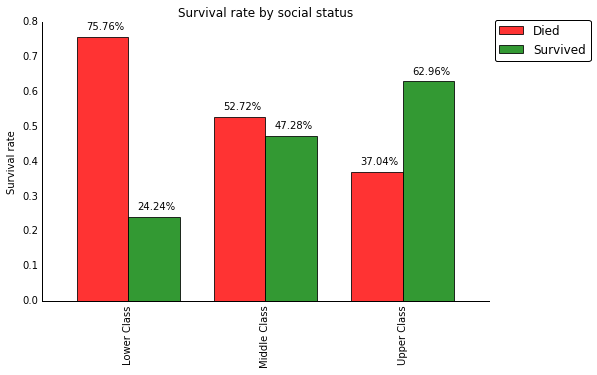

In [35]:
graphs_survival(Pclass_surv,' ','Survival rate','Survival rate by social status')

The probability to survive increases by social class.

### 4.5. Did family presence on Titanic board influence survival?  

* ** Crosstab Has_Family by Survival status**

In [36]:
Has_Family_surv=pd.crosstab(titanic_df.Has_Family, titanic_df.Survived,normalize='index') 
Has_Family_surv.columns= ["Died","Survived"]
Has_Family_surv
Has_Family_surv.style.format("{:.2%}")

* ** Survival rate by Presence of family aboard**

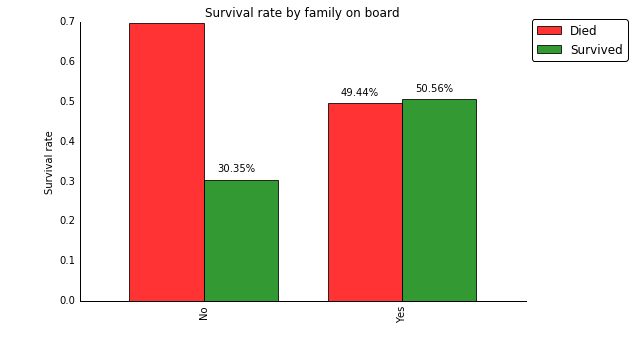

In [37]:
graphs_survival(Has_Family_surv,' ','Survival rate','Survival rate by family on board')

From the graph above, the passengers with family aboard had more chances to survive. 
<br><br>But how was this chance influenced by the size of the family. Did those with large family have lower chances to survive?

### 4.6. Did family size influence survival?  

* **Crosstab Family_size by Survival status**

In [38]:
Family_size_surv=pd.crosstab(titanic_df.Family_size, titanic_df.Survived,normalize='index') 
Family_size_surv.columns= ["Died","Survived"]
Family_size_surv
Family_size_surv.style.format("{:.2%}")

* **Survival rate by Family size graph**

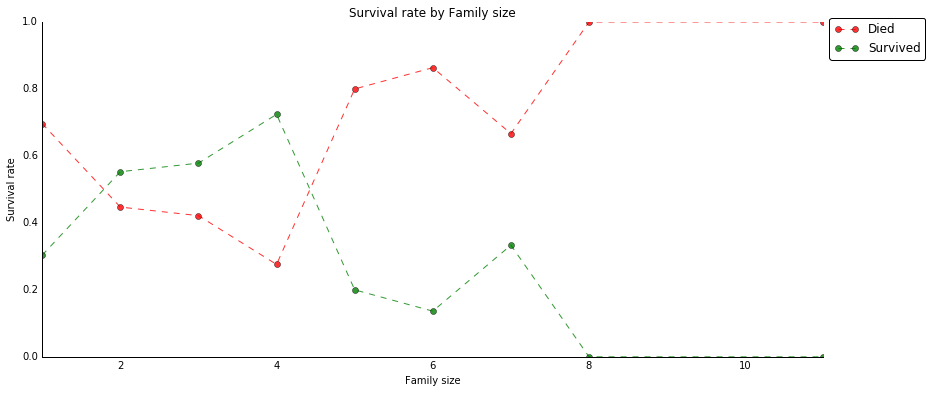

In [39]:
ax=Family_size_surv.plot(color=['r','g'], alpha=0.8,figsize=(14, 6),marker='o', linestyle='--')
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.03),
          ncol=1, fancybox=True)
plt.title('Survival rate by Family size') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')  

It seems that passengers witch had 1 to 3 family members aboard Titanic had increased chance of survival. The trend is descending for passengers with more than 3 family members. 
<br><br>Next, I will explore how did social class influence survability of those with/without family on board.

### 4.7. Did presence of family on board and social class influence survival?

* **Crosstab Has_Family & Pclass by Survival status**

In [40]:
survived_Has_Family_class = pd.crosstab(index=[titanic_df["Pclass"],titanic_df["Has_Family"]], 
                                 columns=titanic_df["Survived"],
                                 margins=True)
survived_Has_Family_class.columns= ["Died","Survived","Totalcol"]

survived_Has_Family_class=survived_Has_Family_class.div(survived_Has_Family_class["Totalcol"],axis=0)
survived_Has_Family_class.style.format("{:.2%}")

* **Survival rate by Social status and Family aboard graph**

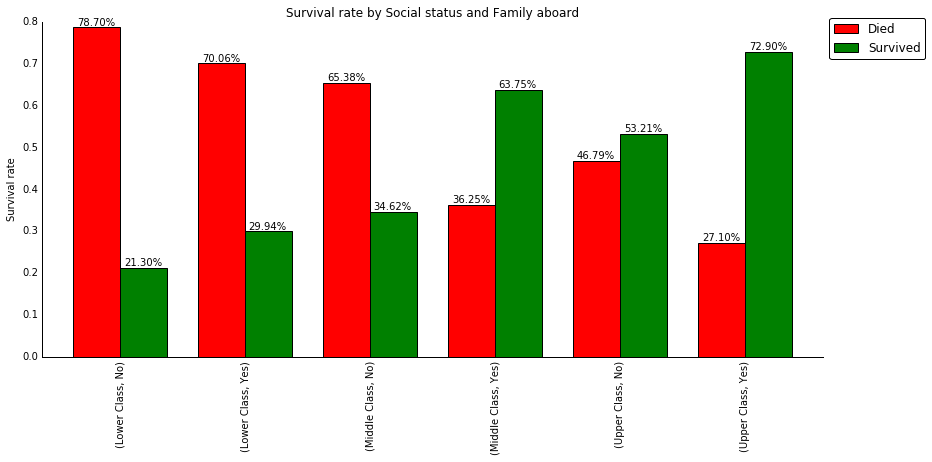

In [41]:
ax=survived_Has_Family_class.iloc[:6,:2].plot(kind='bar',color=['r','g'], figsize=(14, 6),width=0.75)
plt.xlabel(' ')
plt.ylabel('Survival rate')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.03),
          ncol=1, fancybox=True)

plt.title('Survival rate by Social status and Family aboard') 
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.2%}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.16, b.y1 + 0.005))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

The passengers from 3rd class which travelled alone had the lowest chance to survive. 
<br><br>The passengers from 2nd and 1st class witch travelled with family had greatly higher chances to survive. 


# 5. Conclusions

Limitations of the report:
- 177 missing values in the age column.
- The data analyzed was a sample 
- I used only descriptive analysis, so the findings are tentative. No statistical test was apply to validate the results. 

So, a person aboard Titanic had the most chances to survive if: was a woman or child, had a ticket for 1st class, travelled with less than 4 family members.
I didn't explore how Fare influenced the survability, but I assume that fare and social class are somehow correlated and have the same trend.

